In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('1950-2019actualtornadoes.csv')

In [3]:
df1.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,9.5,150,2,0,1,0,0,0,0,0
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,3.6,130,1,1,1,135,0,0,0,0
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0.1,10,1,1,1,161,0,0,0,0
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,0.6,17,1,1,1,113,0,0,0,0
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,2.3,300,1,1,1,93,0,0,0,0


In [4]:
print(df1.shape)
print(df1.mag.value_counts())

(65162, 29)
 0    30358
 1    22053
 2     9325
 3     2497
 4      572
-9      298
 5       59
Name: mag, dtype: int64


In [5]:
df1.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [6]:
df1.shape

(65162, 29)

In [7]:
df_year=df1.groupby('yr')
year_count=df_year.yr.count()

C:\Users\nshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


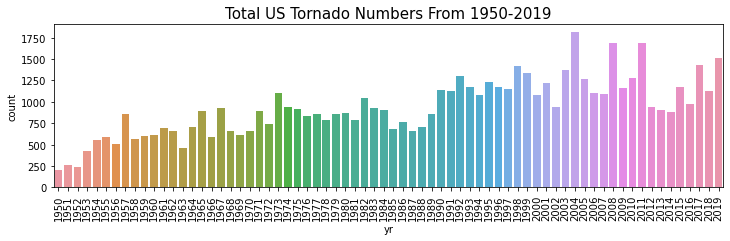

In [8]:
plt.figure(figsize=(12, 3))
ax=sns.countplot(df1['yr'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Total US Tornado Numbers From 1950-2019', fontsize=15 );

C:\Users\nshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


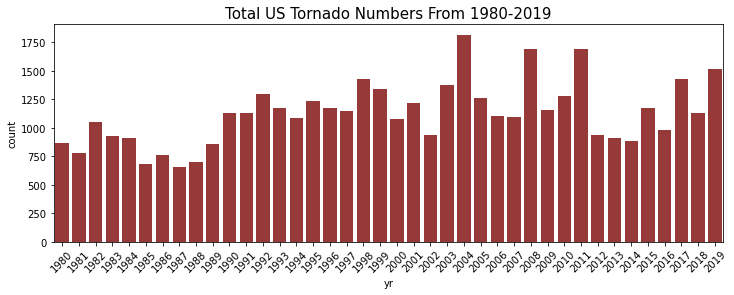

In [9]:
plt.figure(figsize=(12, 4))
ax=sns.countplot(df1['yr'][df1.yr>1979],color='brown')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Total US Tornado Numbers From 1980-2019', fontsize=15 );

C:\Users\nshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


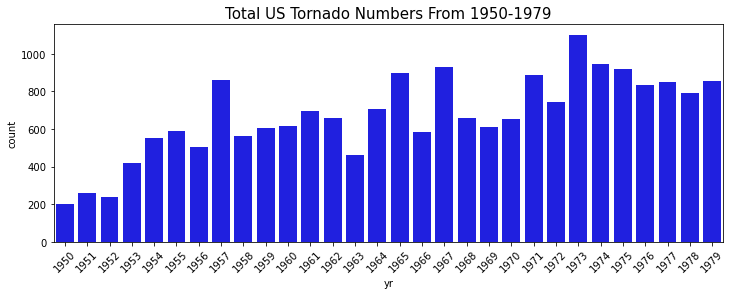

In [10]:
plt.figure(figsize=(12, 4))
ax=sns.countplot(df1['yr'][df1.yr<1980],color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Total US Tornado Numbers From 1950-1979', fontsize=15 );

In [11]:
df_year=df1[df1.yr>1979].groupby('yr')
year_count=df_year.time.count()
from statsmodels.tsa.stattools import kpss
kpss(year_count)

C:\Users\nshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\nshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.3419058602161745,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

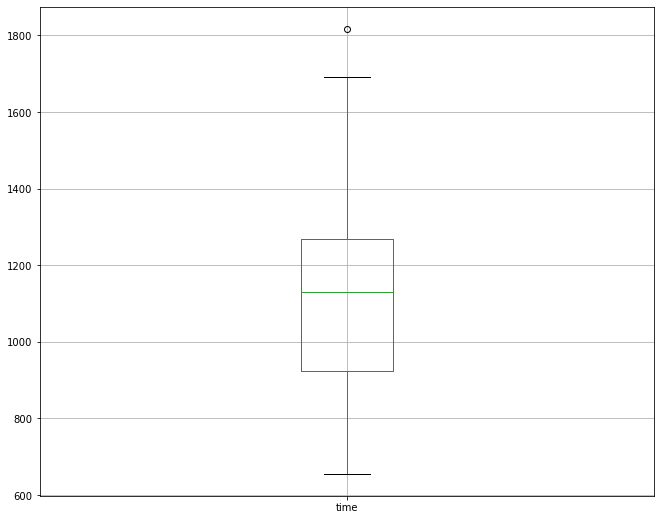

In [55]:
year_count=pd.DataFrame(year_count)
year_count.boxplot()

In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(year_count)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.773770
p-value: 0.003187
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


In [15]:
import pmdarima as pm
results=pm.auto_arima(year_count)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -270.459
Date:                Wed, 20 Oct 2021   AIC                            544.917
Time:                        10:01:55   BIC                            548.244
Sample:                             0   HQIC                           546.111
                                 - 40                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7067      0.146     -4.832      0.000      -0.993      -0.420
sigma2      6.073e+04   1.51e+04      4.021      0.000    3.11e+04    9.03e+04
===================================================================================
Ljung-Box (Q):                       23.43   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.97   Prob(JB):                         0.69
Heteroskedasticity (H):               2.52   Skew:                             0.24
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(year_count, order=(0,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(10)
forecast[0]

C:\Users\nshan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\nshan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


array([1293.7580119 , 1305.03974906, 1316.32148622, 1327.60322338,
       1338.88496054, 1350.1666977 , 1361.44843486, 1372.73017202,
       1384.01190918, 1395.29364634])

In [58]:
forecast

(array([1293.7580119 , 1305.03974906, 1316.32148622, 1327.60322338,
        1338.88496054, 1350.1666977 , 1361.44843486, 1372.73017202,
        1384.01190918, 1395.29364634]),
 array([242.47748915, 248.74466186, 254.85776594, 260.82763449,
        266.66388764, 272.37511455, 277.9690218 , 283.45255536,
        288.83200168, 294.11307222]),
 array([[ 818.51086609, 1769.0051577 ],
        [ 817.50917047, 1792.57032764],
        [ 816.8094438 , 1815.83352863],
        [ 816.3904536 , 1838.81599315],
        [ 816.23334479, 1861.53657629],
        [ 816.32128289, 1884.0121125 ],
        [ 816.6391633 , 1906.25770641],
        [ 817.17337219, 1928.28697184],
        [ 817.9115883 , 1950.11223005],
        [ 818.8426174 , 1971.74467527]]))

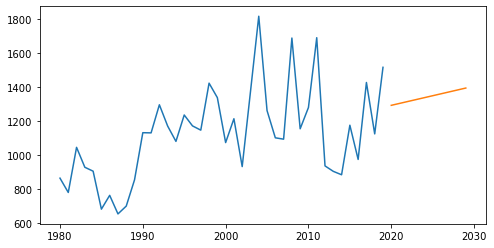

In [17]:
prediction=pd.Series(forecast[0])
prediction.index=range(2020,2030)
plt.figure(figsize=(8, 4))
plt.plot(year_count)
plt.plot(prediction)

plt.show()

In [57]:
year_count.describe()

,time
count,40.00000
mean,1124.47500
std,274.49562
min,656.00000
25%,924.25000
50%,1129.00000
75%,1267.50000
max,1817.00000


In [19]:
df1=df1[df1.yr>1979]
df_US=pd.read_csv('state-areas.csv')
df1=df1.merge(df_US, on='st')

In [20]:
print(df1.head())
print(df1.shape)

    om    yr  mo  dy        date      time  tz  st  stf  stn  ...  ns  sn  sg  \
0    1  1980   1  11  1980-01-11  12:45:00   3  OH   39    1  ...   1   1   1   
1   68  1980   4   3  1980-04-03  19:20:00   3  OH   39    2  ...   1   1   1   
2   69  1980   4   3  1980-04-03  19:30:00   3  OH   39    3  ...   1   1   1   
3  119  1980   4   8  1980-04-08  14:10:00   3  OH   39    4  ...   1   1   1   
4  122  1980   4   8  1980-04-08  14:20:00   3  OH   39    5  ...   1   1   1   

    f1  f2  f3  f4  fc  state  area (sq. mi)  
0  173   0   0   0   0   Ohio          44828  
1  173   0   0   0   0   Ohio          44828  
2   11   0   0   0   0   Ohio          44828  
3  135   0   0   0   0   Ohio          44828  
4   17   0   0   0   0   Ohio          44828  

[5 rows x 31 columns]
(44978, 31)


In [88]:
df_state=df1.groupby('st')
US_state_count=df_state.time.count()
state_count=US_state_count.sort_values(ascending=False)

,time
st,
TX,5735
KS,3012
OK,2455
FL,2286
NE,1935
IA,1888
IL,1799
CO,1776
MS,1711


In [89]:
state_count['st']=state_count.index
state_count.index=range(1,53)
state_count

,time,st
1,5735,TX
2,3012,KS
3,2455,OK
4,2286,FL
5,1935,NE
6,1888,IA
7,1799,IL
8,1776,CO
9,1711,MS
10,1671,AL


In [22]:
df2=df_US.merge(US_state_count, on='st')

,state_x,st,area (sq. mi),state_y
0,Alabama,AL,52423,1671
1,Alaska,AK,656425,3
2,Arizona,AZ,114006,162
3,Arkansas,AR,53182,1258
4,California,CA,163707,360
5,Colorado,CO,104100,1776
6,Connecticut,CT,5544,60
7,Delaware,DE,1954,37
8,Florida,FL,65758,2286
9,Georgia,GA,59441,1124


In [94]:
df2['Density']=df2.state_y*1000/df2['area (sq. mi)']
df_density=df2.sort_values(by='Density',ascending=False)
df2_density=df_density[['state_x', 'Density']]

,state_x,Density
15,Kansas,36.605819
23,Mississippi,35.326424
35,Oklahoma,35.120095
8,Florida,34.763831
14,Iowa,33.548937
0,Alabama,31.875322
12,Illinois,31.061155
17,Louisiana,30.245163
50,District of Columbia,29.411765
13,Indiana,25.013729


In [95]:
df2_density.reset_index()

,index,state_x,Density
0,15,Kansas,36.605819
1,23,Mississippi,35.326424
2,35,Oklahoma,35.120095
3,8,Florida,34.763831
4,14,Iowa,33.548937
5,0,Alabama,31.875322
6,12,Illinois,31.061155
7,17,Louisiana,30.245163
8,50,District of Columbia,29.411765
9,13,Indiana,25.013729


In [24]:
df_st=df1.groupby(['yr', 'st'])
df_st.st.count()

yr    st
1980  AL    27
      AR    22
      AZ     1
      CA     8
      CO    24
            ..
2019  VT     1
      WA     2
      WI    29
      WV     2
      WY    20
Name: st, Length: 1757, dtype: int64

In [25]:
df_state2=df1[df1.mag.isin([2,3,4,5])].groupby('st')
US_state_count2=df_state2.time.count()
df3=df_US.merge(US_state_count2, on='st')

st
RI      1
VT      2
ME      2
WA      2
OR      3
HI      3
UT      3
CT      5
ID      6
NH      6
MA      7
DE      8
AZ     10
CA     12
WV     12
NJ     13
NM     17
MD     22
MT     23
WY     31
NY     50
ND     71
VA     75
CO     77
MI     95
PA    109
SC    114
FL    122
OH    125
SD    127
WI    139
NC    153
MN    162
IN    166
KY    176
GA    189
NE    205
TN    215
MO    218
IL    228
LA    232
IA    244
KS    277
AR    284
AL    308
MS    324
OK    381
TX    613
Name: time, dtype: int64


In [26]:
df3['Density']=df3.time*1000/df3['area (sq. mi)']
df3.sort_values(by='Density',ascending=False)

,state,st,area (sq. mi),time,Density
22,Mississippi,MS,48434,324,6.689516
0,Alabama,AL,52423,308,5.875284
33,Oklahoma,OK,69903,381,5.450410
2,Arkansas,AR,53182,284,5.340153
39,Tennessee,TN,42146,215,5.101314
12,Indiana,IN,36420,166,4.557935
16,Louisiana,LA,51843,232,4.475050
15,Kentucky,KY,40411,176,4.355250
13,Iowa,IA,56276,244,4.335774
6,Delaware,DE,1954,8,4.094166


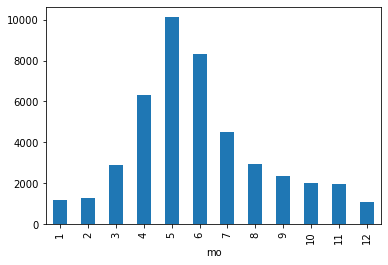

In [27]:
df_month=df1.groupby('mo')
df_month_count=df_month.st.count()
df_month_count.plot.bar()

In [28]:
df1['hour']=df1.time.str.split(':').str[0]

In [29]:
df1.hour=pd.to_numeric(df1.hour)

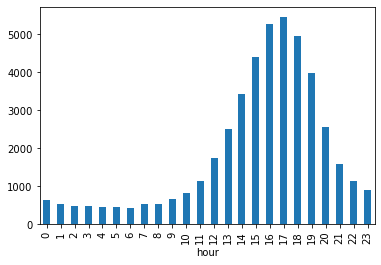

In [30]:
df_hour=df1.groupby(df1.hour)
df_hour.state.count().plot.bar();

In [31]:
df1.date=pd.to_datetime(df1.date)
df1.index=df1.date

In [100]:
df_month=df1.state.groupby(pd.Grouper(freq="1M")).count()
df_month=pd.DataFrame(df_month)
df_month.rename(columns={'state':'Tornadoes'}, inplace=True)
df_month['month'] = pd.DatetimeIndex(df_month.index).to_period('M')
df_month

,Tornadoes,month
date,,
1980-01-31,5,1980-01
1980-02-29,11,1980-02
1980-03-31,41,1980-03
1980-04-30,137,1980-04
1980-05-31,203,1980-05
...,...,...
2019-08-31,78,2019-08
2019-09-30,85,2019-09
2019-10-31,65,2019-10


In [101]:
df_month[df_month.Tornadoes==0]

,Tornadoes,month
date,,
1986-01-31,0,1986-01
2003-01-31,0,2003-01


In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

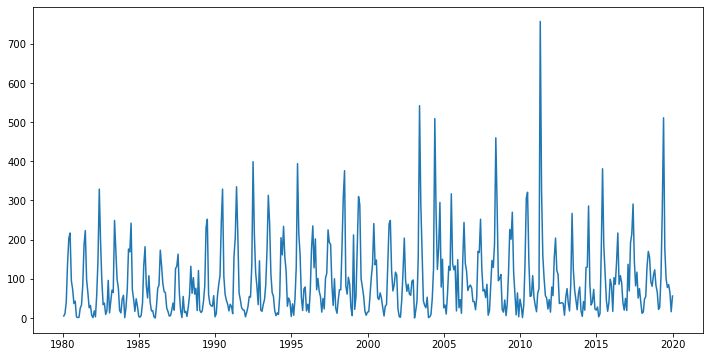

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df_month.Tornadoes)
plt.show();

In [103]:
df_month[df_month.Tornadoes>500]

,Tornadoes,month
date,,
2003-05-31,542,2003-05
2004-05-31,509,2004-05
2011-04-30,757,2011-04
2019-05-31,511,2019-05


In [36]:
df_month.Tornadoes.replace(0, 0.1, inplace=True)

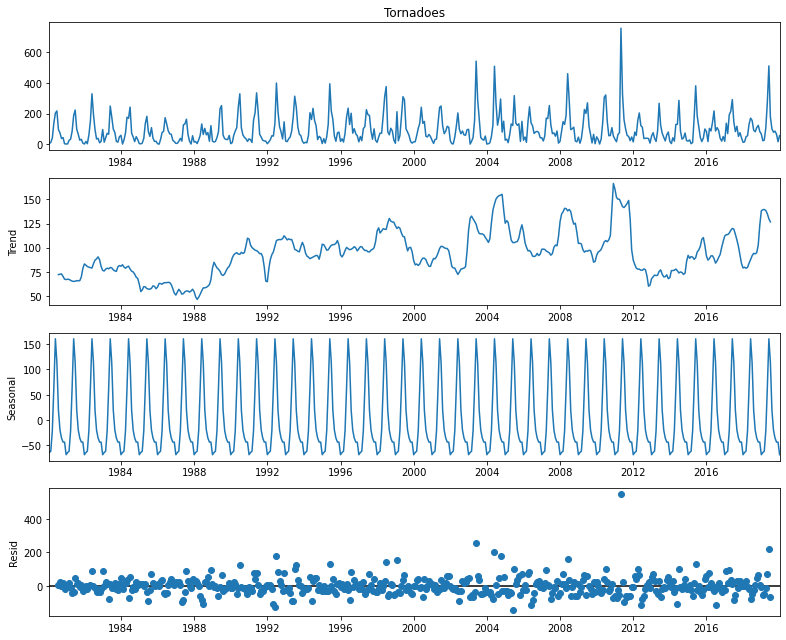

In [37]:
y1=df_month['Tornadoes']
result = seasonal_decompose(y1, model='additive')
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
fig = result.plot()
plt.show()

In [38]:
df_month[df_month.Tornadoes>500]

,Tornadoes,month
date,,
2003-05-31,542.0,2003-05
2004-05-31,509.0,2004-05
2011-04-30,757.0,2011-04
2019-05-31,511.0,2019-05


In [41]:
print('The average number of tonadoes in April: '+ str(df_month.Tornadoes[df_month.month.dt.month==4].mean()))
print('The average number of tonadoes in May: '+ str(df_month.Tornadoes[df_month.month.dt.month==5].mean()))
print('The average number of tonadoes in June: '+ str(df_month.Tornadoes[df_month.month.dt.month==6].mean()))

The average number of tonadoes in April: 157.35
The average number of tonadoes in May: 253.45
The average number of tonadoes in June: 208.225


In [42]:
df_month_st=df1.groupby(['st',pd.Grouper(freq="1M")]).count()

In [43]:
df_month_st=df_month_st[['time']]
df_month_st

time
st date            
AK 2004-06-30     2
   2005-07-31     1
AL 1980-03-31     6
   1980-04-30     9
   1980-05-31     7
...             ...
WY 2019-05-31     1
   2019-06-30     4
   2019-07-31     9
   2019-08-31     2
   2019-09-30     3

[7746 rows x 1 columns]

In [44]:
df_month_st.index

MultiIndex([('AK', '2004-06-30'),
            ('AK', '2005-07-31'),
            ('AL', '1980-03-31'),
            ('AL', '1980-04-30'),
            ('AL', '1980-05-31'),
            ('AL', '1980-06-30'),
            ('AL', '1980-09-30'),
            ('AL', '1980-11-30'),
            ('AL', '1981-02-28'),
            ('AL', '1981-03-31'),
            ...
            ('WY', '2017-06-30'),
            ('WY', '2018-05-31'),
            ('WY', '2018-06-30'),
            ('WY', '2018-07-31'),
            ('WY', '2019-04-30'),
            ('WY', '2019-05-31'),
            ('WY', '2019-06-30'),
            ('WY', '2019-07-31'),
            ('WY', '2019-08-31'),
            ('WY', '2019-09-30')],
           names=['st', 'date'], length=7746)

In [45]:
df3=df_month_st.unstack(level=0)
df3.fillna(0, inplace=True)
df3

time                                                   ...        \
st           AK    AL    AR   AZ   CA    CO   CT   DC   DE    FL  ...    SD   
date                                                              ...         
2004-06-30  2.0   1.0   1.0  0.0  0.0  36.0  0.0  0.0  0.0   6.0  ...   1.0   
2005-07-31  1.0  17.0   0.0  4.0  1.0   5.0  0.0  0.0  0.0  15.0  ...   2.0   
1980-03-31  0.0   6.0   0.0  0.0  0.0   1.0  0.0  0.0  0.0   6.0  ...   0.0   
1980-04-30  0.0   9.0  16.0  0.0  1.0   1.0  0.0  0.0  0.0   5.0  ...   0.0   
1980-05-31  0.0   7.0   0.0  1.0  1.0   7.0  0.0  0.0  0.0  13.0  ...  15.0   
...         ...   ...   ...  ...  ...   ...  ...  ...  ...   ...  ...   ...   
1985-12-31  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...   0.0   
1987-02-28  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...   0.0   
1993-12-31  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...   0.0   
1980-12-31  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...   0.0   
1984-12-31  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...   0.0   

                                                            
st           TN    TX   UT    VA   VT   WA    WI   WV   WY  
date                                                        
2004-06-30  1.0  34.0  0.0   6.0  0.0  3.0  17.0  0.0  1.0  
2005-07-31  1.0  13.0  0.0  12.0  0.0  0.0   1.0  0.0  0.0  
1980-03-31  2.0   7.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  
1980-04-30  4.0  26.0  0.0   3.0  0.0  0.0   5.0  0.0  0.0  
1980-05-31  2.0  44.0  0.0   1.0  0.0  1.0   4.0  0.0  5.0  
...         ...   ...  ...   ...  ...  ...   ...  ...  ...  
1985-12-31  0.0   2.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  
1987-02-28  0.0   1.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  
1993-12-31  0.0   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  
1980-12-31  0.0   1.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  
1984-12-31  0.0   4.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  

[478 rows x 52 columns]

In [46]:
df3=df3.sort_index()
df3

time                                                   ...        \
st           AK    AL    AR   AZ   CA    CO   CT   DC   DE    FL  ...    SD   
date                                                              ...         
1980-01-31  0.0   0.0   0.0  0.0  2.0   0.0  0.0  0.0  0.0   2.0  ...   0.0   
1980-02-29  0.0   0.0   0.0  0.0  3.0   0.0  0.0  0.0  0.0   3.0  ...   0.0   
1980-03-31  0.0   6.0   0.0  0.0  0.0   1.0  0.0  0.0  0.0   6.0  ...   0.0   
1980-04-30  0.0   9.0  16.0  0.0  1.0   1.0  0.0  0.0  0.0   5.0  ...   0.0   
1980-05-31  0.0   7.0   0.0  1.0  1.0   7.0  0.0  0.0  0.0  13.0  ...  15.0   
...         ...   ...   ...  ...  ...   ...  ...  ...  ...   ...  ...   ...   
2019-08-31  0.0   0.0   1.0  1.0  0.0  14.0  0.0  0.0  0.0   1.0  ...   3.0   
2019-09-30  0.0   0.0   0.0  5.0  1.0   5.0  1.0  0.0  0.0   0.0  ...   9.0   
2019-10-31  0.0   4.0   3.0  0.0  0.0   0.0  0.0  0.0  0.0   4.0  ...   0.0   
2019-11-30  0.0   4.0   0.0  4.0  0.0   0.0  0.0  0.0  0.0   1.0  ...   0.0   
2019-12-31  0.0  14.0   0.0  0.0  1.0   0.0  0.0  0.0  0.0   3.0  ...   0.0   

                                                          
st           TN    TX   UT   VA   VT   WA   WI   WV   WY  
date                                                      
1980-01-31  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1980-02-29  0.0   2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1980-03-31  2.0   7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1980-04-30  4.0  26.0  0.0  3.0  0.0  0.0  5.0  0.0  0.0  
1980-05-31  2.0  44.0  0.0  1.0  0.0  1.0  4.0  0.0  5.0  
...         ...   ...  ...  ...  ...  ...  ...  ...  ...  
2019-08-31  0.0   0.0  0.0  1.0  1.0  0.0  1.0  0.0  2.0  
2019-09-30  0.0   2.0  0.0  0.0  0.0  0.0  2.0  0.0  3.0  
2019-10-31  4.0  12.0  0.0  3.0  0.0  2.0  2.0  0.0  0.0  
2019-11-30  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-12-31  3.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[478 rows x 52 columns]

In [47]:
df3['month'] = pd.DatetimeIndex(df3.index).to_period('M')
df3.index=df3['month']

In [48]:
df3.head()

time                                                 ...             \
st        AK   AL    AR   AZ   CA   CO   CT   DC   DE    FL  ...   TN    TX   
month                                                        ...              
1980-01  0.0  0.0   0.0  0.0  2.0  0.0  0.0  0.0  0.0   2.0  ...  0.0   0.0   
1980-02  0.0  0.0   0.0  0.0  3.0  0.0  0.0  0.0  0.0   3.0  ...  0.0   2.0   
1980-03  0.0  6.0   0.0  0.0  0.0  1.0  0.0  0.0  0.0   6.0  ...  2.0   7.0   
1980-04  0.0  9.0  16.0  0.0  1.0  1.0  0.0  0.0  0.0   5.0  ...  4.0  26.0   
1980-05  0.0  7.0   0.0  1.0  1.0  7.0  0.0  0.0  0.0  13.0  ...  2.0  44.0   

                                              month  
st        UT   VA   VT   WA   WI   WV   WY           
month                                                
1980-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1980-01  
1980-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1980-02  
1980-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1980-03  
1980-04  0.0  3.0  0.0  0.0  5.0  0.0  0.0  1980-04  
1980-05  0.0  1.0  0.0  1.0  4.0  0.0  5.0  1980-05  

[5 rows x 53 columns]

In [49]:
pd.period_range(start = '1980-01', end = '2019-12', freq='M').difference(df3.index)

PeriodIndex(['1986-01', '2003-01'], dtype='period[M]', freq='M')

In [50]:
df3.loc['1986-01']=0
df3.loc['2003-01']=0

In [51]:
df4=df3.time[['NC', 'ND','GA','SD','AR','MN','LA','MO','AL','MS','CO','IL','IA','NE','FL','OK','KS','TX']]
df4.corr()

st,NC,ND,GA,SD,AR,MN,LA,MO,AL,MS,CO,IL,IA,NE,FL,OK,KS,TX
st,,,,,,,,,,,,,,,,,,
NC,1.000000,0.011078,0.278819,0.017440,0.236219,0.094712,0.154843,0.169072,0.442445,0.307831,0.067642,0.264083,0.222054,0.031586,0.182505,0.167448,0.108041,0.118087
ND,0.011078,1.000000,-0.097511,0.597164,-0.090906,0.625000,-0.127259,0.061981,-0.112031,-0.160263,0.459836,0.227967,0.398455,0.516989,0.113023,0.014987,0.251126,0.062223
GA,0.278819,-0.097511,1.000000,-0.039826,0.179571,-0.077860,0.279877,0.087838,0.454938,0.268978,-0.045058,0.040555,0.049610,-0.032249,0.214839,0.108838,0.086738,0.115613
SD,0.017440,0.597164,-0.039826,1.000000,-0.056433,0.502290,-0.073630,0.095919,-0.087513,-0.111157,0.519461,0.242344,0.425305,0.629607,0.146119,0.124882,0.381590,0.177465
AR,0.236219,-0.090906,0.179571,-0.056433,1.000000,-0.066798,0.395364,0.480782,0.431865,0.412572,-0.008313,0.295388,0.119981,0.031625,-0.031217,0.310131,0.186222,0.230986
MN,0.094712,0.625000,-0.077860,0.502290,-0.066798,1.000000,-0.090985,0.091352,-0.122994,-0.127115,0.432903,0.227937,0.477425,0.440345,0.121507,0.093950,0.337445,0.153395
LA,0.154843,-0.127259,0.279877,-0.073630,0.395364,-0.090985,1.000000,0.132283,0.356505,0.531615,-0.049586,0.060872,-0.023511,-0.017853,0.078112,0.186171,0.085316,0.285573
MO,0.169072,0.061981,0.087838,0.095919,0.480782,0.091352,0.132283,1.000000,0.218300,0.243002,0.147000,0.563049,0.338066,0.297629,-0.076783,0.444120,0.389587,0.306413
AL,0.442445,-0.112031,0.454938,-0.087513,0.431865,-0.122994,0.356505,0.218300,1.000000,0.603602,-0.095467,0.208778,0.038026,-0.054347,0.029900,0.160620,0.052597,0.157204


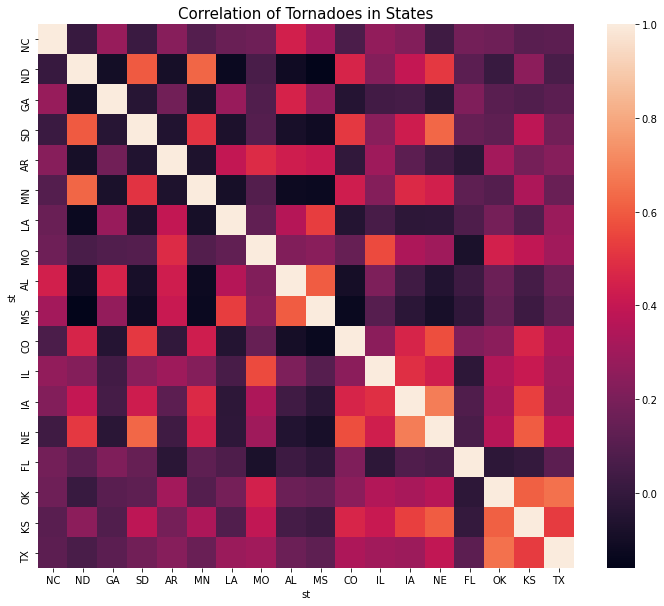

In [52]:
plt.figure(figsize=(12,10))
ax=sns.heatmap(df4.corr())
ax.set_title('Correlation of Tornadoes in States', fontsize=15);

In [98]:
df4.describe().round(1)

st,NC,ND,GA,SD,AR,MN,LA,MO,AL,MS,CO,IL,IA,NE,FL,OK,KS,TX
count,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0
mean,2.2,2.3,2.3,2.5,2.6,3.0,3.3,3.3,3.5,3.6,3.7,3.7,3.9,4.0,4.8,5.1,6.3,11.9
std,4.5,5.3,5.1,6.1,6.5,6.5,5.6,7.0,7.1,7.0,7.5,8.0,7.4,8.0,5.6,12.0,13.1,17.9
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50%,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0
75%,2.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,6.0,5.0,7.0,16.2
max,47.0,43.0,53.0,76.0,66.0,70.0,44.0,72.0,101.0,67.0,59.0,74.0,57.0,77.0,55.0,104.0,125.0,127.0
